Исследование выполнила Колесниченко Ксения, 

студентка направления Data Science 1 курса магистратуры НИТУ МИСиС

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


## Данные и их характеристики. 

In [2]:
# Исследование предоставленного набора данных

In [3]:
data=pd.read_csv('xtask.csv')
data.head()

,a,b,c,d,class
0,-0.233408,-0.845698,0.365256,0.311292,1.0
1,0.073524,-0.747284,0.586381,0.303840,1.0
2,0.105561,-0.749805,0.149815,0.635771,1.0
3,-0.642419,-0.342424,-0.608454,0.229135,0.0
4,0.296581,-0.656553,0.022429,0.639708,0.0


In [4]:
print(data.info())
print(data.isnull().sum())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3839 entries, 0 to 3838
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3839 non-null   float64
 1   b       3839 non-null   float64
 2   c       3839 non-null   float64
 3   d       3839 non-null   float64
 4   class   3071 non-null   float64
dtypes: float64(5)
memory usage: 150.1 KB
None
a          0
b          0
c          0
d          0
class    768
dtype: int64
(3839, 5)


Предоставлены данные в формате csv, таблица размером 3839 строк и 5 столбцов.
Один столбец - это признак-результат (класс), бинарная переменная (0 или 1), и 4 столбца - это признаки-факторы (a, b, c, d). 
Все признаки даны в формате float64 (т.е. число с плавающей точкой).
У признаков-факторов нет ни одного пропущенного значения, у признака-результата пропущено 768 значений. При разбиении выборки на тренинговую и тестовую строки с пустыми значениями класса попадут в тестовую выборку, а остальные - в трениговую.

1.0    2026
0.0    1045
Name: class, dtype: int64
[ 1.  0. nan]
AxesSubplot(0.125,0.125;0.775x0.755)


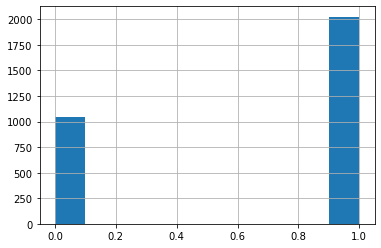

In [5]:
print(data['class'].value_counts())
print(data['class'].unique())
print(data['class'].hist())

Анализ признака-результата показал, что данные в 2026 случаев принимают значение 1, и в 1045 - значение 0. Можно говорить о некоторой разбалансировке классов, т.к. их число отличается в 2 раза. Тем не менее, сам по себе факт наличия более 1000 единиц наблюдения в самом маленьком классе говорит о достаточном наборе данных для обучения модели машинного обучения. 

### Анализ признаков-факторов
Анализ данных описательной статистики признаков a, b,c, d говорит о следующем: 
- форма распределения визуально напоминает плосковершинное распределение;
- данные лежат в диапазоне близком к (-1,1) при этом среднее значение находится посередение, принимая значение близкое к 0;
- медиана не равна среднему арифметическому значению, а это говорит о том, что распределение не является нормальным;
- СКО,  очевидно означает, что по правилу 3 сигм распределение не является нормальным;
- асимметрия близка к 0, что говорит о практически симметричности вариационного ряда (т.е. варианты, равноудалённые от среднего арифметического значения, имеют одинаковую частоту),
- эксцесс, характеризующий крутизну распределения, меньше  0, что говорит о том, что распределение не является нормальным, а является о плосковершиным. 

#### Анализ признака "а"

In [6]:
skew_a=(data['a'].skew())
kurt_a=(data['a'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_a), (kurt_a))
data['a'].describe()

Асимметрия: 0.017741923391943276
Эксцесс: -1.0060542627802453


count    3839.000000
mean        0.000237
std         0.492286
min        -0.995371
25%        -0.394078
50%        -0.008509
75%         0.399061
max         0.995987
Name: a, dtype: float64

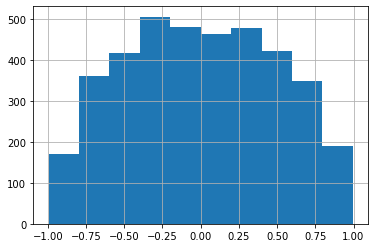

In [7]:
data.a.hist();

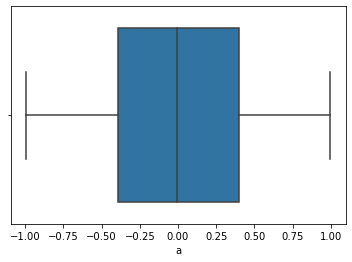

In [8]:
sns.boxplot(data['a']);

#### Анализ признака "b"

In [9]:
skew_b=(data['b'].skew())
kurt_b=(data['b'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_b), (kurt_b))

data['b'].describe()

Асимметрия: 0.03388651418045496
Эксцесс: -0.991404923144477


count    3839.000000
mean       -0.001918
std         0.493000
min        -0.996342
25%        -0.395845
50%        -0.010900
75%         0.395606
max         0.993865
Name: b, dtype: float64

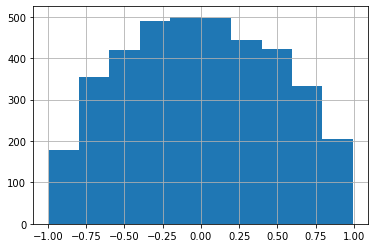

In [10]:
data.b.hist();

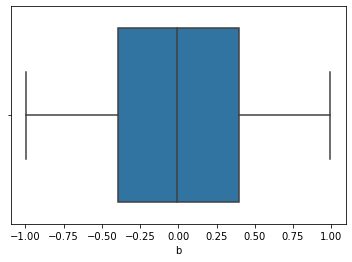

In [11]:
sns.boxplot(data['b']);

#### Анализ признака "с"

In [12]:
skew_a=(data['b'].skew())
kurt_a=(data['b'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_b), (kurt_b))
data['c'].describe()

Асимметрия: 0.03388651418045496
Эксцесс: -0.991404923144477


count    3839.000000
mean       -0.005020
std         0.489641
min        -0.996055
25%        -0.395307
50%        -0.015388
75%         0.382006
max         0.988428
Name: c, dtype: float64

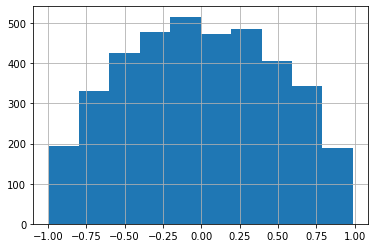

In [13]:
data.c.hist();

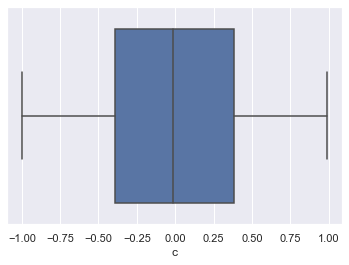

In [45]:
sns.boxplot(data['c']);

#### Анализ признака "d"

In [15]:
skew_d=(data['d'].skew())
kurt_d=(data['d'].kurt())
print('Асимметрия: {}\nЭксцесс:'.format(skew_d), (kurt_d))
data['d'].describe()

Асимметрия: -0.019303363029502998
Эксцесс: -1.0400403983618247


count    3839.000000
mean        0.017286
std         0.504631
min        -0.998084
25%        -0.386948
50%         0.015544
75%         0.436341
max         0.997183
Name: d, dtype: float64

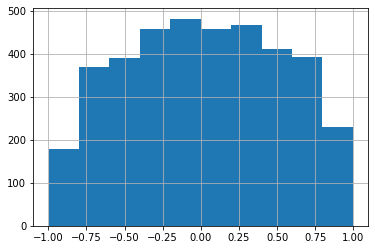

In [16]:
data['d'].hist();

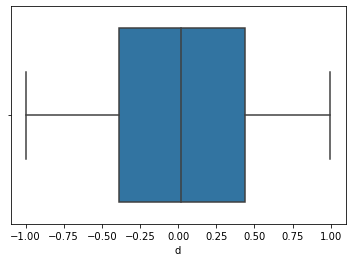

In [17]:
sns.boxplot(data['d']);

### Формирование набора данных для подачи в модели
#### Признаки test, train, x, y, x_test

Как показал анализ признаков-факторов выше, они уже очищены, предобработаны, стандартизированы, поэтому повторно их стандартизировать не требуется. 

In [18]:
test=data[data['class'].isna()]
train=data.drop(test.index)
y=train['class']
x=train.drop(['class'], axis = 1) 
x_test=test.drop(['class'], axis = 1) 

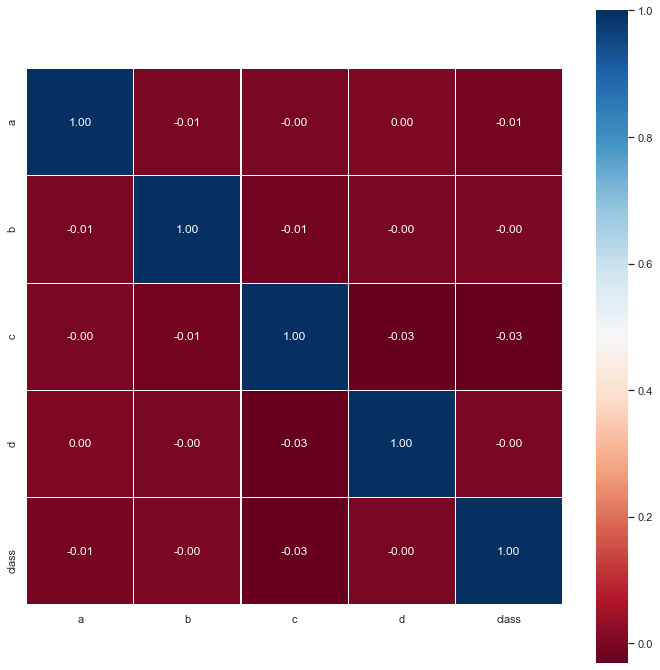

In [19]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

Корреляционная матрица показала отсутствие линейной связи между признаками-факторами, поэотму мы не будем исключать из анализа никакие переменные. 

#### Создание полиномиальных переменных

Создаём признаки-факторы,  полином 2 степени от имеющихся данных

In [20]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)[:,1:]
x_poly = pd.DataFrame(x_poly)
print(x_poly.shape)


(3071, 14)


In [21]:
x_test_poly = poly.fit_transform(x_test)[:,1:]
x_test_poly = pd.DataFrame(x_test_poly)
print(x_test_poly.shape)


(768, 14)


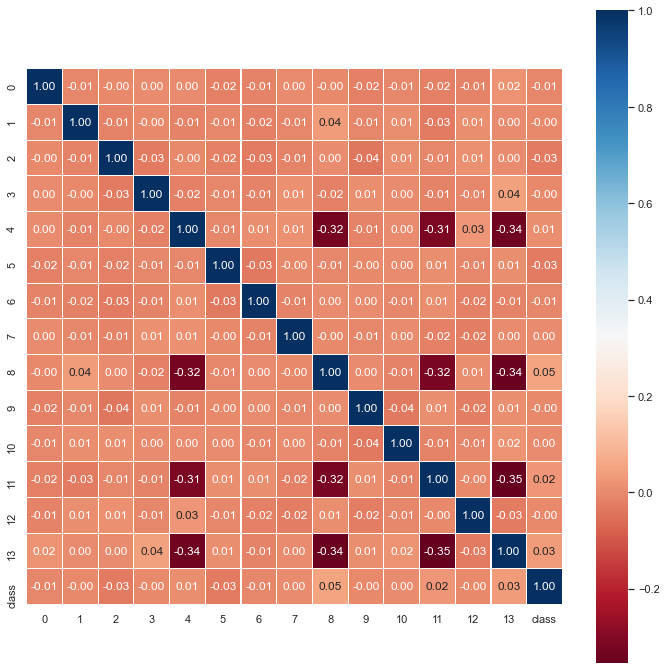

In [22]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(pd.concat([x_poly, y], axis=1).corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

Корреляционная матрица показала слабую линейную связь между полиномиальными признаками-факторами, поэотму мы не будем исключать из анализа никакие переменные. 

Разделим получившиеся данные на обучающую и тестовую выборки в соотношении 80:20.

In [23]:
# Разделим получившиеся данные на обучающую и тестовую выборки в соотношении 80:20.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_poly, x_val_poly, y_train_poly, y_val_poly = train_test_split(x_poly, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print('\n')
print(x_train_poly.shape)
print(x_val_poly.shape)
print(y_train_poly.shape)
print(y_val_poly.shape)

(2456, 4)
(615, 4)
(2456,)
(615,)


(2456, 14)
(615, 14)
(2456,)
(615,)


## Обучение модели методом градиентного бустинга, подбор гиперпараметров

### На полиномиальных признаках

##### Лучшим решением оказалось обучение градиентного бустинга на  полиномиальных признаках
#####  Precision : 0.908
#####  Recall: 0.858
#####  Accuracy (доля правильных ответов): 0.837
Это довольно высокие значения с учётом того, что классы разбалансированы (разница между классами почти 2 раза). 


Обучим модель GradientBoostingClassifier (из библиотеки sklearn), используя параметры по умолчанию 
(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None).
#Во всех методах, где присутствует случайность, укажем random_state=42.
Это будет наш baseline. Укажем точность на тестовой выборке (параметр score)

In [24]:
clf_grad_poly = ensemble.GradientBoostingClassifier(random_state=42)
clf_grad_poly.fit(x_train_poly, y_train_poly)
print('score: {}'.format(clf_grad_poly.score(x_val_poly, y_val_poly)))

score: 0.6650406504065041


10


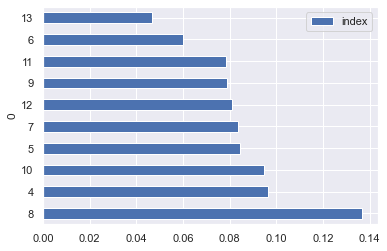

In [25]:
feature_importances_frame = pd.DataFrame(list(x_train_poly.columns),clf_grad_poly.feature_importances_).sort_index(ascending=False)
print(feature_importances_frame.reset_index().iloc[2,1])
feature_importances_frame.reset_index().set_index(0).iloc[:10].plot.barh();


Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. 
Ему на вход подается модель, список параметров и способ оценивания. 
При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становится та, при которой значение метрики максимально. Укажем в качестве estimator градиетный бустинг с параметрами "по умолчанию" и random_state=42. В параметре scoring укажем 'accuracy', n_jobs=-1, cv=5.

In [26]:
%%time

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1], 
    'n_estimators' : [500, 1000,  1500, 1750]
}

clf_grad_poly = ensemble.GradientBoostingClassifier(random_state=42)
grid_search_GB = GridSearchCV(
    clf_grad_poly,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=5
)
grid_search_GB.fit(x_train_poly, y_train_poly)
print(grid_search_GB.score(x_val_poly, y_val_poly))
print(grid_search_GB.best_score_)
print(grid_search_GB.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  1.8min remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.9min finished


0.8373983739837398
0.8171899061149471
{'learning_rate': 1, 'n_estimators': 1750}
Wall time: 2min 8s


In [27]:
best_model_gb=grid_search_GB.best_estimator_
print('Precision: {}'.format(precision_score(grid_search_GB.predict(x_val_poly), y_val)))
print('Recall: {}'.format(recall_score(grid_search_GB.predict(x_val_poly), y_val)))
print('Accuracy: {}'.format(accuracy_score(grid_search_GB.predict(x_val_poly), y_val)))

Precision: 0.9077669902912622
Recall: 0.8577981651376146
Accuracy: 0.8373983739837398


In [28]:
prediction=best_model_gb.predict(x_test_poly)
answers=pd.DataFrame({'predict': prediction })
answers.to_csv('Y_test.csv', index=False)

In [ ]:
print(grid_search_GB.best_params_)
print(grid_search_GB.best_estimator_)

### На обычных признаках

Обучим модель GradientBoostingClassifier (из библиотеки sklearn), используя параметры по умолчанию (learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None).
Во всех методах, где присутствует случайность, укажем random_state=42. Это будет наш baseline. Укажем точность на тестовой выборке (параметр score). 

In [29]:

clf_gb = ensemble.GradientBoostingClassifier(random_state=42)
clf_gb.fit(x_train, y_train)
print('score: {}'.format(clf_gb.score(x_val, y_val)))

score: 0.6715447154471544


c


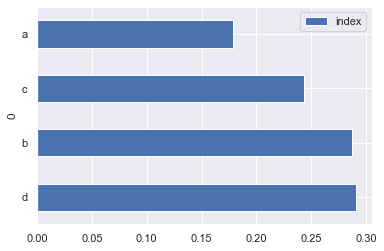

In [30]:
feature_importances_frame = pd.DataFrame(list(x_train.columns),clf_gb.feature_importances_).sort_index(ascending=False)
print(feature_importances_frame.reset_index().iloc[2,1])
feature_importances_frame.reset_index().set_index(0).iloc[:10].plot.barh();


С методической точки зрения было бы правильным одновременно перебирать параметры, указав вместе с learning_rate=0.1, n_estimators=100 и max_depth, но попытка использовать такую комбинацию требует очень много ресурсов, которых не хватает даже в colab, поэтому было принято решение разделить процесс на 2 этапа.

In [31]:
param_grid = {
    'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
    'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

clf_gb = ensemble.GradientBoostingClassifier(random_state=42)
grid_search_GB_lin = GridSearchCV(clf_gb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_GB_lin.fit(x_train, y_train)
print(grid_search_GB_lin.score(x_val, y_val))
print(grid_search_GB_lin.best_score_)
print(grid_search_GB_lin.best_params_)

0.7138211382113822
0.6608332091467555
{'learning_rate': 1, 'n_estimators': 1750}


Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используем градиентный 
бустинг с ранее подобранными параметрами и random_state=42. Переберём все значения max_depth от 5 до 15 включительно. 
В ответ запишем значение параметра, при котором точность максимальна.

In [33]:
%%time

param_grid = {'max_depth':range(5,16)}

clf_gb = ensemble.GradientBoostingClassifier(random_state=42,learning_rate= 1,n_estimators= 1750)
grid_search_GB_lin = GridSearchCV(clf_gb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search_GB_lin.fit(x_train, y_train)
print(grid_search_GB_lin.score(x_val, y_val))
print(grid_search_GB_lin.best_score_)
print(grid_search_GB_lin.best_params_)

0.6715447154471544
0.6417018528637426
{'max_depth': 5}
Wall time: 13min 7s


In [34]:
print('Precision: {}'.format(precision_score(grid_search_GB_lin.predict(x_val), y_val)))
print('Recall: {}'.format(recall_score(grid_search_GB_lin.predict(x_val), y_val)))
print('Accuracy: {}'.format(accuracy_score(grid_search_GB_lin.predict(x_val), y_val)))

Precision: 0.8155339805825242
Recall: 0.7272727272727273
Accuracy: 0.6715447154471544


## Обучение модели методом случайного леса. Подбор гиперпараметров
### На обычных признаках

Обучим модель RandomForestClassifier (из библиотеки sklearn), используя параметры по умолчанию 
(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None).
Во всех методах, где присутствует случайность, укажем random_state=42.
Это будет наш baseline. Укажем точность на тестовой выборке (параметр score)

In [35]:
clf_RFC = RandomForestClassifier()

clf_RFC.fit(x_train, y_train)
print('score: {}'.format(clf_RFC.score(x_val, y_val)))

score: 0.6487804878048781


Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. 
Ему на вход подается модель, список параметров и способ оценивания. 
При запуске метода fit модель обучается со всеми возможными комбинациями параметров,  лучшей комбинацией параметров становится та, при которой значение метрики максимально.
Укажем в качестве estimator случайный лес с параметрами "по умолчанию" и random_state=42. 
В параметре scoring укажем 'accuracy', n_jobs=-1, cv=5.

In [36]:
%%time

param_grid = { 'n_estimators': range (100, 700, 100),
              'max_depth': range (3, 13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)} 
clf_RFC = ensemble.RandomForestClassifier(random_state=42)
grid_search_RF = GridSearchCV(clf_RFC, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_RF.fit(x_train, y_train)
print(grid_search_RF.score(x_val, y_val))
print(grid_search_RF.best_score_)
print(grid_search_RF.best_params_)

0.6682926829268293
0.6579810574073154
{'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 100}
Wall time: 11min 54s


In [37]:
print('Precision: {}'.format(precision_score(grid_search_RF.predict(x_val), y_val)))
print('Recall: {}'.format(recall_score(grid_search_RF.predict(x_val), y_val)))
print('Accuracy: {}'.format(accuracy_score(grid_search_RF.predict(x_val), y_val)))

Precision: 0.9927184466019418
Recall: 0.6704918032786885
Accuracy: 0.6682926829268293


### На полиномиальных признаках.

Обучим модель RandomForestClassifier (из библиотеки sklearn), используя параметры по умолчанию 
(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None).
Во всех методах, где присутствует случайность, укажем random_state=42.
Это будет наш baseline. Укажем точность на тестовой выборке (параметр score)

In [38]:

clf_RFC_poly = RandomForestClassifier()

clf_RFC_poly.fit(x_train_poly, y_train_poly)
print('score: {}'.format(clf_RFC_poly.score(x_val_poly, y_val_poly)))

score: 0.6682926829268293


Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. 
Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становится та, при которой значение метрики максимально.
Укажем в качестве estimator случайный лес с параметрами "по умолчанию" и random_state=42. 
В параметре scoring укажем 'accuracy', n_jobs=-1, cv=5.

In [39]:
%%time

param_grid = { 'n_estimators': range (100, 700, 100),
              'max_depth': range (3, 13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)} 
clf_RFC_poly = ensemble.RandomForestClassifier(random_state=42)
grid_search_RFC_poly = GridSearchCV(clf_RFC_poly, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_RFC_poly.fit(x_train_poly, y_train_poly)
print(grid_search_RFC_poly.score(x_val_poly, y_val_poly))
print(grid_search_RFC_poly.best_score_)
print(grid_search_RFC_poly.best_params_)

0.6715447154471544
0.659199741691918
{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Wall time: 14min 29s


In [40]:
grid_search_RFC_poly.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [44]:
print('Precision: {}'.format(precision_score(grid_search_RFC_poly.predict(x_val_poly), y_val)))
print('Recall: {}'.format(recall_score(grid_search_RFC_poly.predict(x_val_poly), y_val)))
print('Accuracy: {}'.format(accuracy_score(grid_search_RFC_poly.predict(x_val_poly), y_val)))

Precision: 1.0
Recall: 0.6710097719869706
Accuracy: 0.6715447154471544


## Обучение модели логистической регрессией. Подбор гиперпараметров


In [42]:
%%time
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

logreg2=LogisticRegression(C=1,penalty="l2", solver='liblinear')
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_val,y_val))


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6571660859465738
score 0.6699186991869919
Wall time: 691 ms


In [43]:
print('Precision: {}'.format(precision_score(logreg_cv.predict(x_val), y_val)))
print('Recall: {}'.format(recall_score(logreg_cv.predict(x_val), y_val)))
print('Accuracy: {}'.format(accuracy_score(logreg_cv.predict(x_val), y_val)))

Precision: 1.0
Recall: 0.6699186991869919
Accuracy: 0.6699186991869919
